In [71]:
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re


In [2]:
responses = pd.read_csv(r'./Data/formresponses.csv')

In [61]:
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/shrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
responses

,Random Number,What are things that make you glad to live in Grinnell?,What things have the greatest positive impact on your quality of life in Grinnell?,Tell us about a time when you felt particularly connected to the community or proud to live in Grinnell.,"Do you think Grinnell has a set of core values? (e.g. what is important, what we believe, principles guiding our behavior) What do you think they are?","If you have considered moving from Grinnell, what are reasons you decided to stay?","If you do not currently live here, what changes in the community might cause you to move to Grinnell?",Have there been things that have made you consider leaving Grinnell? What were they?,What things have frustrated you about living in Grinnell?,What things do you think Grinnell is missing – that would benefit you personally if it had?\n,"If funds were unlimited, what changes would you make to improve Grinnell?","If you do not currently live here, what changes in the community would make you more likely to move to Grinnell?","Tell us about you or your group. \n(club affiliation, profession, service group, etc.)\n\nWere you recruited by someone to take the survey? Who?",What aspects of the Grinnell community (positive or negative) do people NOT talk about?,Are there questions we’re not asking that you think we should? Is there anything that you would like to share that you have not?,Do you live in the city of Grinnell?,"If you are a student, please tell us where",Timestamp,Unnamed: 18,Unnamed: 19
0,1,"Alexandria Minnesota - great summer vibe, lots...","Restaurant closures, lack of communication, co...",A housing development that attracted people fo...,People and relationships.,Relationships.,NaN,NaN,Grinnell College sort of dabbles in community ...,Thank you.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/18/2022 14:28:28,NaN,NaN
1,2,Many small shops and restaurants where people ...,Not having more nice restaurant choices. Road ...,Mid-level restaurant chains like Applebees or ...,Central Park activities. Hospital and health i...,"Family, the school district and college.","Homecoming events, Ag Day, 4th of July and whe...",Extroverted! But also Deep family roots and de...,Socioeconomic issues. Not everyone wants to be...,If you moved away and came back to live in Gri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/20/2022 21:53:24,NaN,NaN
2,3,Grinnell College. I believe a college town gen...,Grinnell College and Ahrens Park.,My years serving on the Grinnell Newburg schoo...,I believe quality education is one of our core...,Easy living. It isn't as quaint as we might l...,NaN,No. Stay and work to improve what might be lac...,"Lack of childcare isn't unique to Grinnell, bu...",an ocean.,"Pre-school for all 4 year olds, and free child...",NaN,I came to Grinnell as a 24 yr. old with a youn...,The narrow mindedness of many Grinnellians.,"We are talking about housing in the community,...",NaN,NaN,11/11/2022 8:47:37,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,covered heated walkways to encourage walking i...,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2022 10:49:57,NaN,NaN
4,5,"Smaller town, but with more amenities than wha...",Being able to dine out and purchase items with...,During the derecho. It was nice to see neighbo...,"Kindness, serving, investment","My husband was self-employed, and it was much ...",NaN,Most of our family is in the Des Moines area a...,"Lately, the continued loss of restaurants and ...",A Walgreens or CVS Pharmacy. Somewhere that y...,More economic development to recruit good qual...,NaN,NaN,The good the city does in keeping up infrastru...,NaN,NaN,NaN,11/11/2022 11:13:22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [108]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

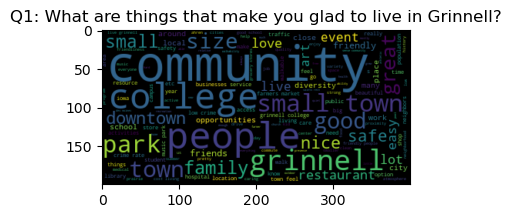

In [118]:
alltextq1 = responses['What are things that make you glad to live in Grinnell?  '].dropna()
listtextq1 = alltextq1.tolist()

#to prevent College and college being different
strtextq1 = " ".join(listtextq1).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq1 = re.split(r',| ', strtextq1)
#to get rid of stop words
listtext_withoutstopwordsq1 = [i for i in listtextonewordq1 if i not in sw_nltk]

finaltextq1 = " ".join(listtext_withoutstopwordsq1)

#visualize
wordcloud = WordCloud().generate(finaltextq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq1)
# print(finaltextq1)


In [ ]:
wcq1 = word_count(finaltextq1)
wcsortedq1 = sorted(wcq1.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq1 = dict(wcsortedq1)
# print(dict_wcsortedq1)

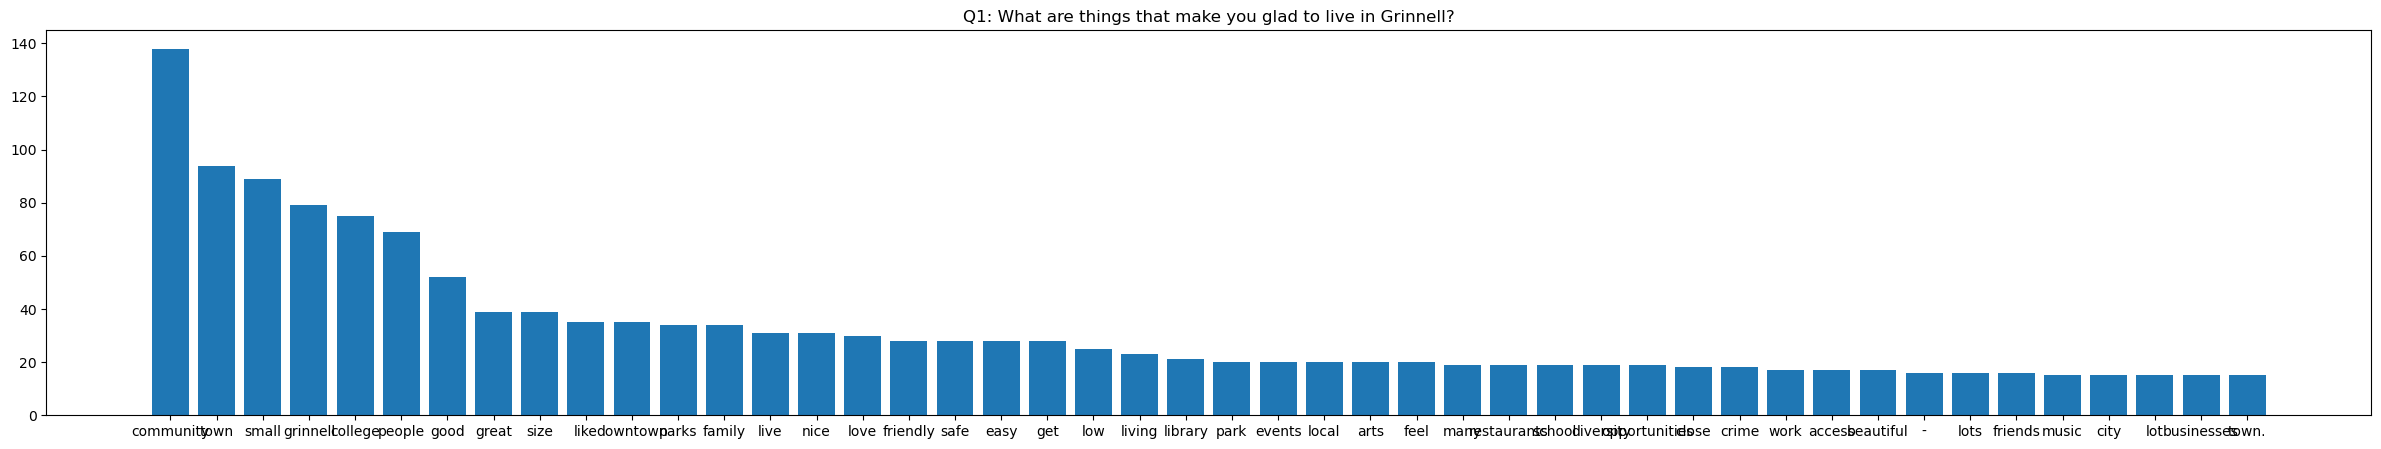

In [107]:
resultq1 = {key:value for (key, value) in dict_wcsortedq1.items() if value >= 15}

wordsq1 = list(resultq1.keys())
countsq1 = list(resultq1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(resultq1)), countsq1, tick_label=wordsq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

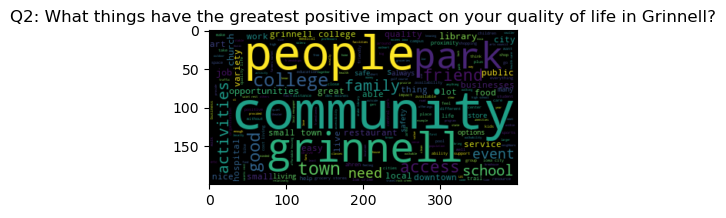

In [117]:
alltextq2 = responses['What things have the greatest positive impact on your quality of life in Grinnell? '].dropna()
listtextq2 = alltextq2.tolist()

#to prevent College and college being different
strtextq2 = " ".join(listtextq2).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq2 = re.split(r',| ', strtextq2)
#to get rid of stop words
listtext_withoutstopwordsq2 = [i for i in listtextonewordq2 if i not in sw_nltk]

finaltextq2 = " ".join(listtext_withoutstopwordsq2)

#visualize
wordcloud = WordCloud().generate(finaltextq2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq2)
# print(finaltextq2)


In [114]:
wcq2 = word_count(finaltextq2)
wcsortedq2 = sorted(wcq2.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq2 = dict(wcsortedq2)
# print(dict_wcsortedq2)

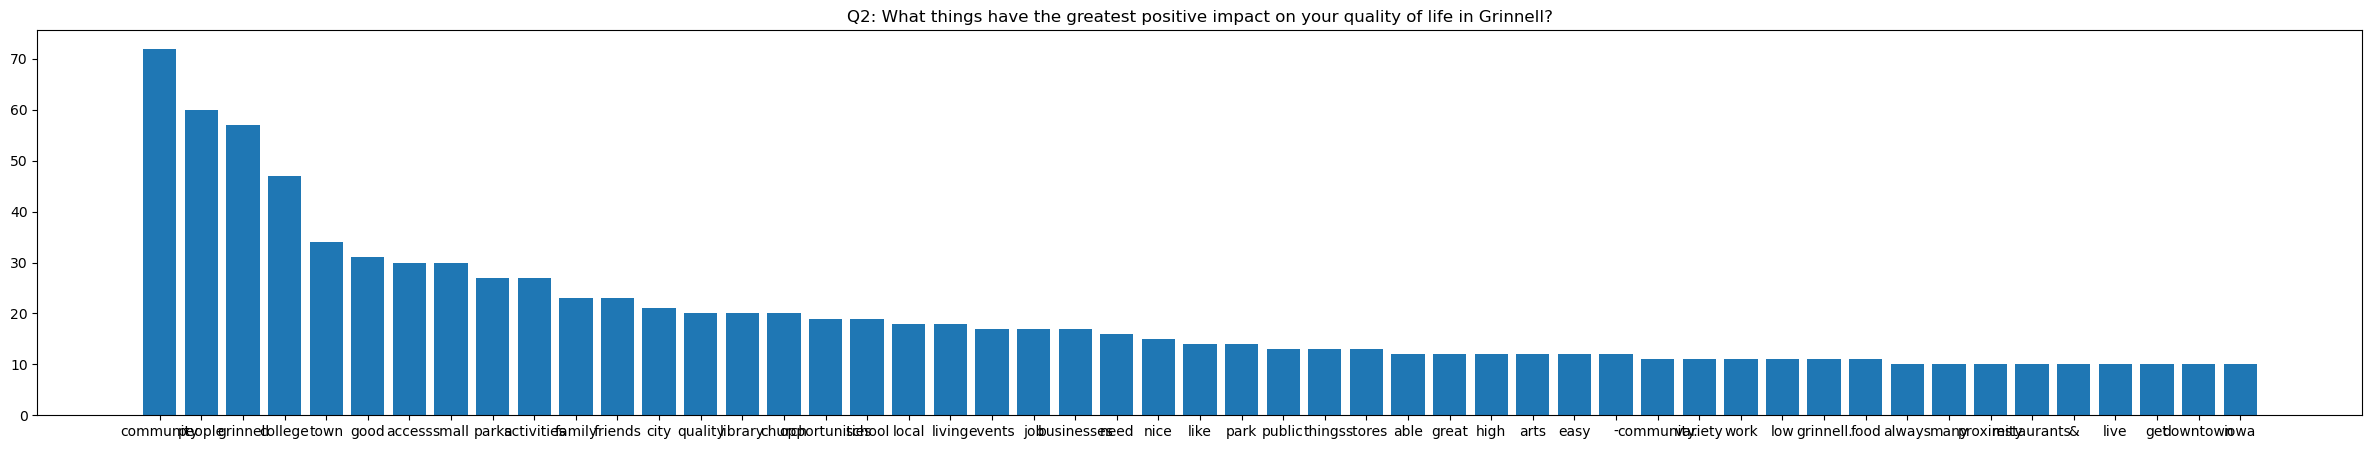

In [116]:
resultq2 = {key:value for (key, value) in dict_wcsortedq2.items() if value >= 10}

wordsq2 = list(resultq2.keys())
countsq2 = list(resultq2.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(resultq2)), countsq2, tick_label=wordsq2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()